In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

brands = pd.read_csv('brands_cl.csv')
orderlines = pd.read_csv('orderlines_cl.csv')
orders = pd.read_csv('orders_cl.csv')
products = pd.read_csv('products_cl.csv')

In [2]:
[products.price.isnull().sum(), orderlines.unit_price.isnull().sum()]

[587, 0]

In [3]:
products.drop(columns='max_price_orderlines', inplace=True)
products = products.dropna(subset=['price'])
products.price.isnull().sum()

0

# Set Categories (from Felix)

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re


pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)


products['price_level'] = np.where(products.price <= 250, 'convenient', 'exclusive')
products['price_level'] = np.where(products.price >= 1000 , 'upscale', products.price_level)


products = (products
    .assign(brands_letters=products['sku'].str[:3])
    .merge(brands, left_on='brands_letters', right_on='short')
    .drop(columns=['brands_letters','short'])
)


products = products[['sku','long','name','desc','price','price_level','type']]
products.rename(columns={'sku':'sku','long':'brand','name':'name','desc':'desc','price':'price','price_level':'price_level','type':'type'}, inplace=True)


#Categoriesvariables
storage = 'SSD|HDD|Storage|Drive|SATA|Data|SDHC|SDXC|Seagate|WD|WesternDigital|Hard.*Disk|RAID'
protection = 'Case|Protector|Capsule|Gauntlet|Sleeve|EnclosureProtection'
cable = 'Cable|Charger'
adapter = 'Adapter'
sound = 'Speaker|Phones|Sound|Headset|Voice'
memory = 'DDR'
nas = 'NAS'
docks = 'Dock|Dockingstation'
inputdev = 'Mouse|Keyboard| Pen|Track'
battery = 'Battery|mAh'
network = 'Wireless|Switch|Router|wi-fi|LAN|Port|Powerline'

ItemList = storage+"|"+protection+"|"+cable+"|"+adapter+"|"+sound+"|"+memory+"|"+nas+"|"+docks+"|"+inputdev+"|"+battery+"|"+network
#ItemList = ItemList.replace("|","&")


#create a Column with name and description
products['namedesc'] = products.name + products.desc

products['product_category'] = np.where(products.name.str.contains(storage, flags=re.IGNORECASE, regex=True), 'Storagehardware', "--O-T-H-E-R--")
products['product_category'] = np.where(products.name.str.contains(protection, flags=re.IGNORECASE, regex=True), 'Protection', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(cable, flags=re.IGNORECASE, regex=True), 'Cables & Charger', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(adapter, flags=re.IGNORECASE, regex=True), 'Adapter', products['product_category'])
#products['product_category'] = products.name.str.findall('SSD|HDD|Storage|Drive|SATA|Data|SDHC|SDXC', flags=re.IGNORECASE)
products['product_category'] = np.where(products.name.str.contains(sound, flags=re.IGNORECASE, regex=True), 'Sound', products['product_category'])

products['product_category'] = np.where(products.name.str.contains(memory, flags=re.IGNORECASE, regex=True), 'Memory', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(nas, flags=re.IGNORECASE, regex=True), 'NAS', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(docks, flags=re.IGNORECASE, regex=True), 'Dockingstation', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(inputdev, flags=re.IGNORECASE, regex=True), 'Input Device', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(battery, flags=re.IGNORECASE, regex=True), 'Battery', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(network, flags=re.IGNORECASE, regex=True), 'Networkequipment', products['product_category'])

products['product_category'] = np.where((products.brand == 'Apple') & products.name.str.contains('TV', flags=re.IGNORECASE, regex=True), 'TV', products['product_category'])
products['product_category'] = (np.where((products.brand == 'Apple') & products.name.str.contains('Watch', flags=re.IGNORECASE, regex=True)
                                                                    & products.name.str.contains('mm', flags=re.IGNORECASE, regex=True), 'Smartwatch', products['product_category']))
products['product_category'] = np.where((products.brand == 'Apple') & products.name.str.contains('Monitor|Display', flags=re.IGNORECASE, regex=True), 'Monitor', products['product_category'])
products['product_category'] = np.where((products.brand == 'Apple') & products.name.str.contains('iPod', flags=re.IGNORECASE, regex=True), 'Musicplayer', products['product_category'])
products['product_category'] = (np.where((products.brand == 'Apple') & products.name.str.contains('iPad|Tablet|Studio', flags=re.IGNORECASE, regex=True)
                                                                    & products.name.str.contains('GB', flags=re.IGNORECASE, regex=True), 'Tablet', products['product_category']))
products['product_category'] = (np.where((products.brand == 'Apple') & products.name.str.contains('i?Phone', flags=re.IGNORECASE, regex=True)
                                                                    & products.name.str.contains('GB', flags=re.IGNORECASE, regex=True), 'Smartphone', products['product_category']))
products['product_category'] = (np.where((products.brand == 'Apple')& products.name.str.contains('MacBook|Notebook|Laptop', flags=re.IGNORECASE, regex=True)
                                                                    & products.name.str.contains('GhZ|core', flags=re.IGNORECASE, regex=True),
                                                                     'Laptop', products['product_category']))
products['product_category'] = (np.where((products.brand == 'Apple') & products.name.str.contains('i?Mac|Desktop', flags=re.IGNORECASE, regex=True)
                                                                     & products.name.str.contains('GhZ|core', flags=re.IGNORECASE, regex=True),
                                                                     'Desktop-PC', products['product_category']))
products['condition'] = np.where(products.name.str.contains('second hand|refurbished|nearly new|like new|very good|well|open', flags=re.IGNORECASE, regex=True), 'used', "new")
#remove the namedesc-column
products.drop(columns=["namedesc"], inplace=True)
products.head(10)

,sku,brand,name,desc,price,price_level,type,product_category,condition
0,RAI0007,Rain Design,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,convenient,8696,Networkequipment,new
1,RAI0014,Rain Design,Rain Design iSlider iPad Support,Anodized aluminum support multiposition iPad and iPad mini.,49.99,convenient,1216,Networkequipment,new
2,RAI0015,Rain Design,Rain Design MTower support MacBook Air / Pro,Aluminum support for MacBook Pro and MacBook Air,59.99,convenient,8696,Networkequipment,new
3,RAI0016,Rain Design,Rain Design iLevel2 MacBook Support,Adjustable aluminum bracket height compatible with all MacBook,84.99,convenient,8696,Networkequipment,new
4,RAI0018,Rain Design,"Rain Design Mbase Support for iMac 27 """,Minimalist support lifting drawer iMac 27,84.99,convenient,8696,Networkequipment,new
5,RAI0017,Rain Design,"Rain Design Mbase 215 iMac Support """,Minimalist lifting support drawer 215 inch iMac,72.99,convenient,8696,Networkequipment,new
6,RAI0013,Rain Design,Silver Rain Design mStand360 Support,Swivel stand compatible with all MacBook aluminum,72.99,convenient,8696,Networkequipment,new
7,RAI0019,Rain Design,Rain Design mStand Support Gold,Aluminum support compatible with all MacBook,59.99,convenient,8696,Networkequipment,new
8,RAI0020,Rain Design,Rain Design Gray Space mStand Support,Aluminum support compatible with all MacBook,59.99,convenient,8696,Networkequipment,new
9,RAI0001-A,Rain Design,(Open) Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,convenient,1298,Networkequipment,used


# Load discounts

In [5]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True


In [6]:
orders.head()

,order_id,created_date,total_paid,state,check_orders
0,241319,2017-01-02 13:35:40,44.99,Cancelled,True
1,241423,2017-11-06 13:10:02,136.15,Completed,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True
4,243784,2017-11-24 13:35:19,157.86,Cancelled,True


In [7]:
ol_prices = (
orderlines
    .groupby(by=["sku"])
    .agg(min_ol_price=("unit_price", "min"),mean_ol_price=("unit_price", "mean"),max_ol_price=("unit_price", "max"))
    .reset_index()
)
ol_prices.head()
ol_prices.mean_ol_price.isnull().sum()

products = pd.merge(products, ol_prices, left_on="sku", right_on="sku", how='inner')
products.head()
# products.mean_ol_price.isnull().sum()

,sku,brand,name,desc,price,price_level,type,product_category,condition,min_ol_price,mean_ol_price,max_ol_price
0,RAI0007,Rain Design,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,convenient,8696,Networkequipment,new,0.00,46.28,54.99
1,RAI0015,Rain Design,Rain Design MTower support MacBook Air / Pro,Aluminum support for MacBook Pro and MacBook Air,59.99,convenient,8696,Networkequipment,new,0.00,43.51,49.99
2,RAI0016,Rain Design,Rain Design iLevel2 MacBook Support,Adjustable aluminum bracket height compatible with all MacBook,84.99,convenient,8696,Networkequipment,new,59.00,64.79,66.99
3,RAI0018,Rain Design,"Rain Design Mbase Support for iMac 27 """,Minimalist support lifting drawer iMac 27,84.99,convenient,8696,Networkequipment,new,63.74,72.83,76.99
4,RAI0017,Rain Design,"Rain Design Mbase 215 iMac Support """,Minimalist lifting support drawer 215 inch iMac,72.99,convenient,8696,Networkequipment,new,53.71,61.74,64.99


In [30]:
# products[products.price.isnull()]
# products[products.mean_ol_price.isnull()]
# orderlines[orderlines.sku=="KIN0008"]

,sku,brand,name,desc,price,price_level,type,product_category,condition,min_ol_price_x,mean_ol_price_x,max_ol_price_x,min_ol_price_y,mean_ol_price_y,max_ol_price_y,min_ol_price,mean_ol_price,max_ol_price


In [39]:
products["price_diff"] = products["price"] - products["mean_ol_price"]
products["discount_perc"] = 100-products["mean_ol_price"]/products["price"]*100
products.sort_values(by="discount_perc", ascending=False).head(25)

[
    ["all products:", products.shape[0]], 
    ["products without discount:", products.shape[0] - products[products.price_diff>0].shape[0]], 
    ["products with discount:", products[products.price_diff>0].shape[0]], 
    ["percentage:", products[products.price_diff>0].shape[0]/products.shape[0]*100]
]

[['all products:', 7437],
 ['products without discount:', 317],
 ['products with discount:', 7120],
 ['percentage:', 95.73752857334948]]

In [33]:
[
 ["discount minimum:", products.discount_perc.min()],
 ["discount mean:", products.discount_perc.mean()],
 ["discount maximum:", products.discount_perc.max()]
]

[['discount minimum:', -626.8317200297842],
 ['discount mean:', 18.71673622715784],
 ['discount maximum:', 90.03083590299191]]

In [11]:
products.describe()

,price,min_ol_price,mean_ol_price,max_ol_price,price_diff,discount_perc
count,7437.00,7437.00,7437.00,7437.00,7437.00,7437.00
mean,619.01,490.48,539.92,581.46,79.09,18.72
std,1205.17,1038.31,1083.56,2159.18,173.39,18.13
min,2.99,-119.00,2.12,2.24,-1302.00,-626.83
25%,39.99,23.39,30.66,32.99,6.18,7.21
50%,105.00,68.99,86.08,90.99,18.26,15.83
75%,596.99,409.16,482.79,513.90,69.17,25.90
max,15339.00,13799.00,14364.85,159989.83,2604.47,90.03


In [12]:
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

products[products.price>0].sort_values(by="discount_perc", ascending=False).head(15)

,sku,brand,name,desc,price,price_level,type,product_category,condition,min_ol_price,mean_ol_price,max_ol_price,price_diff,discount_perc
4860,LIF0052-A,Lifeproof,Open - Waterproof iPad Case Lifeproof nüüd 234 Black,Waterproof protective sleeve for iPad 2/3/4,119.99,convenient,1298,Protection,used,11.57,11.96,12.06,108.03,90.03
2329,OWC0267,OWC,OWC Removal Tool motherboard Mac Mini 2010-2012,Dismounting tool Apple Mac Mini,48.99,convenient,14305406,--O-T-H-E-R--,new,4.99,4.99,4.99,44.00,89.81
1668,MOP0105,Mophie,Mophie Powerstation 6000mAh battery Universal Plus Rose Gold,external battery capacity 6000mAh output voltage 5V,89.95,convenient,1515,Battery,new,3.33,9.37,9.99,80.58,89.58
1664,MOP0108,Mophie,Mophie Powerstation Mini Universal 4000mAh Battery Plus Gold,external battery capacity 4000mAh output voltage 5V,69.95,convenient,1515,Battery,new,3.99,7.32,7.99,62.63,89.53
1669,MOP0106,Mophie,Mophie Powerstation 6000mAh battery Universal Plus Gold,external battery capacity 6000mAh output voltage 5V,89.95,convenient,1515,Battery,new,4.99,9.55,9.99,80.40,89.39
1663,MOP0107,Mophie,Mophie Powerstation 4000mAh Battery Plus Mini Universal Space Gray,external battery capacity 4000mAh output voltage 5V,69.95,convenient,1515,Battery,new,1.60,7.64,26.99,62.31,89.08
1665,MOP0109,Mophie,Mophie Powerstation Mini Universal 4000mAh Battery Plus Rose Gold,external battery capacity 4000mAh output voltage 5V,69.95,convenient,1515,Battery,new,2.00,7.64,26.99,62.31,89.07
5887,AP20124,Apple,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital cameras iPad 1 2 and 3,35.00,convenient,13955395,--O-T-H-E-R--,used,4.74,4.96,4.99,30.04,85.83
4859,LIF0038-A,Lifeproof,Open - LifeProof Fre Waterproof Case iPhone 6 Rosa,waterproof and extreme conditions for iPhone 6 case.,79.99,convenient,1298,Protection,used,12.54,12.54,12.54,67.45,84.32
4302,NTE0039-A,NewerTech,Open - KX NuGuard NewerTech iPhone Case SE / 5s / 5 Black,IPhone Case SE / 5s / 5 ultra resistant for extreme conditions,60.99,convenient,11865403,Protection,used,7.90,9.62,14.99,51.37,84.22


# Visualisation

In [13]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format
plt.style.use('default')

## Graphic: Sales and Discount

In [17]:
list=[["all",products[(products.discount_perc>=0)].count()[0]], 
 ["0-0",products[products.discount_perc==0].count()[0]],
 ["0-10",products[(products.discount_perc>0)&(products.discount_perc<10)].count()[0]],
 ["10-20",products[(products.discount_perc>=10)&(products.discount_perc<20)].count()[0]],
 ["20-30",products[(products.discount_perc>=20)&(products.discount_perc<30)].count()[0]],
 ["30-40",products[(products.discount_perc>=30)&(products.discount_perc<40)].count()[0]],
 ["40-50",products[(products.discount_perc>=40)&(products.discount_perc<50)].count()[0]],
 ["50-60",products[(products.discount_perc>=50)&(products.discount_perc<60)].count()[0]],
 ["60-70",products[(products.discount_perc>=60)&(products.discount_perc<70)].count()[0]],
 ["70-80",products[(products.discount_perc>=70)&(products.discount_perc<80)].count()[0]],
 ["80-90",products[(products.discount_perc>=80)&(products.discount_perc<90)].count()[0]],
 ["90-100",products[(products.discount_perc>=90)&(products.discount_perc<=100)].count()[0]]
]
list

[['all', 7255],
 ['0-0', 135],
 ['0-10', 2137],
 ['10-20', 2139],
 ['20-30', 1379],
 ['30-40', 713],
 ['40-50', 334],
 ['50-60', 217],
 ['60-70', 117],
 ['70-80', 63],
 ['80-90', 20],
 ['90-100', 1]]

In [18]:
listp = []
l = [i for i in range(len(list)-1)]
for i in l:
    listp.append(list[i+1][1]/list[0][1]*100)
listp

[1.8607856650585803,
 29.455547898001377,
 29.483115093039284,
 19.007580978635424,
 9.827705031013094,
 4.603721571330118,
 2.991040661612681,
 1.6126809097174362,
 0.8683666436940041,
 0.2756719503790489,
 0.013783597518952445]

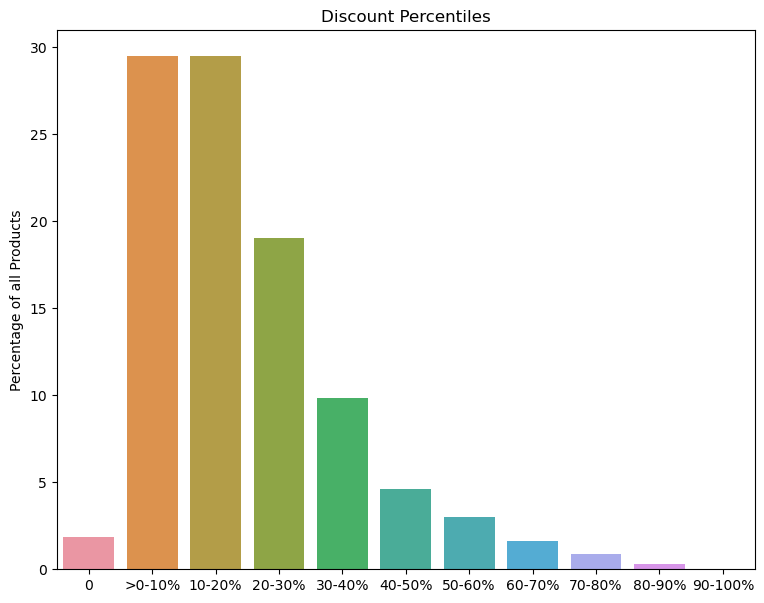

In [19]:
xlabel=["0",">0-10%","10-20%","20-30%","30-40%","40-50%","50-60%","60-70%","70-80%","80-90%","90-100%"]
plt.subplots(figsize=(9, 7))
p = sns.barplot(
    y=listp, # x values on our chart
    x=xlabel, # y values on our chart
)

plt.title('Discount Percentiles')
plt.ylabel('Percentage of all Products')
plt.show()

## Graphic: Products with at least 30% discount

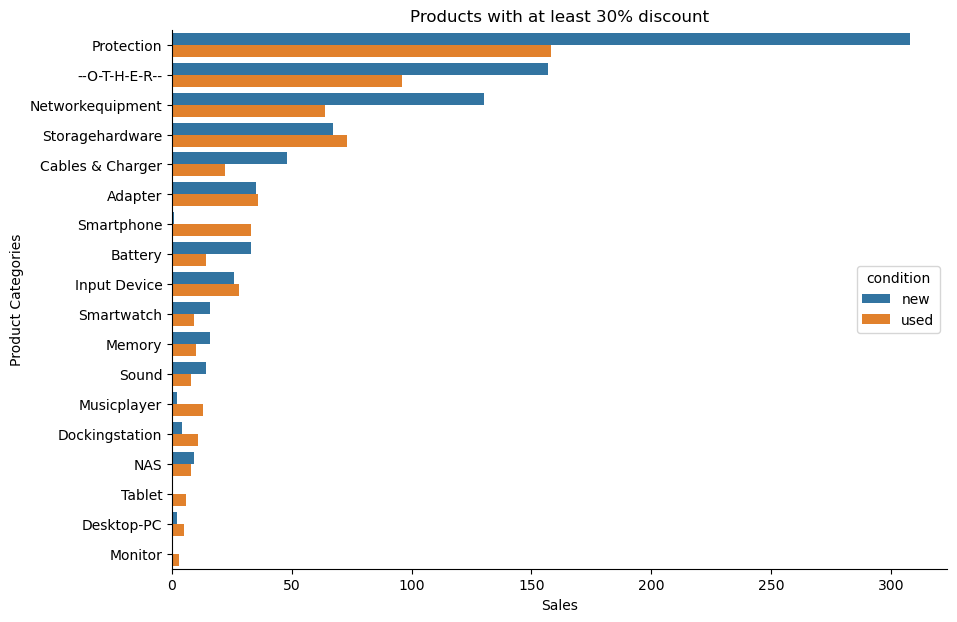

In [20]:
df=products[products.discount_perc>=30].groupby(by=["product_category","condition"]).agg(Sales=("sku", "count")).sort_values(by="Sales", ascending=False).reset_index()
plt.subplots(figsize=(10, 7))
p = sns.barplot(
    data=df, # dataframe we will use to look for the columns information
    y="product_category", # x values on our chart
    x="Sales", # y values on our chart
    hue='condition', # group color in our chart
    # color='dodgerblue'
    # order="Sales"
)

plt.title('Products with at least 30% discount')
plt.ylabel('Product Categories')
sns.despine()
plt.show()

In [21]:
products[products.discount_perc>=0].groupby(by=["product_category"]).agg(average_prod_price=("mean_ol_price", "mean")).sort_values(by="average_prod_price", ascending=False).reset_index()

,product_category,average_prod_price
0,Desktop-PC,2544.69
1,Storagehardware,831.58
2,NAS,791.20
3,Tablet,760.23
4,Smartphone,629.87
5,--O-T-H-E-R--,441.02
6,Smartwatch,393.57
7,Dockingstation,159.90
8,Input Device,153.11
9,TV,137.42
